# Group Project Notebook 4

## Imports

Import required libraries:

In [284]:
# THIS IS FOR MLXTEND
# %pip install mlxtend

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import os
import plotly.offline as po
import plotly.graph_objs as pg
from functools import reduce
from scipy.stats import zscore
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

Load Food Environment Atlas from USDA saved in Github repo. The data consists of multiple spreadsheets with the categories health, insecurity, socioeconomic, stores, local, access, assistance. 

## Get Data

In [286]:
health_url = 'https://github.com/elarson5/Food-Deserts-and-Health-Outcomes/raw/refs/heads/master/data/usda_health.xlsx'
health = pd.read_excel(health_url)

insecurity_url = 'https://github.com/elarson5/Food-Deserts-and-Health-Outcomes/raw/refs/heads/master/data/usda_insecurity.xlsx'
insecurity = pd.read_excel(insecurity_url)

socioeconomic_url = 'https://github.com/elarson5/Food-Deserts-and-Health-Outcomes/raw/refs/heads/master/data/usda_socioeconomic.xlsx'
socioeconomic = pd.read_excel(socioeconomic_url)

stores_url = 'https://github.com/elarson5/Food-Deserts-and-Health-Outcomes/raw/refs/heads/master/data/usda_stores.xlsx'
stores = pd.read_excel(stores_url)

access_url = 'https://github.com/elarson5/Food-Deserts-and-Health-Outcomes/raw/refs/heads/master/data/usda_access.xlsx'
access = pd.read_excel(access_url)

assistance_url = 'https://github.com/elarson5/Food-Deserts-and-Health-Outcomes/raw/refs/heads/master/data/usda_assistance.xlsx'
assistance = pd.read_excel(assistance_url)

In [287]:
# health = pd.read_excel('usda_health.xlsx')
# insecurity = pd.read_excel('usda_insecurity.xlsx')
# socioeconomic = pd.read_excel('usda_socioeconomic.xlsx')
# stores = pd.read_excel('usda_stores.xlsx')
# access = pd.read_excel('usda_access.xlsx')
# assistance = pd.read_excel('usda_assistance.xlsx')

### Subset Data
Retain only the variables of interest from each data frame as well as FIPS and State for merging and other data processing. 

In [288]:
health_df = health[["FIPS", "State", "PCT_OBESE_ADULTS22", "PCT_DIABETES_ADULTS19"]]

In [289]:
insecurity_df = insecurity[["FIPS", "State", 
                "FOODINSEC_21_23", "VLFOODSEC_21_23"]]

In [290]:
socio_df = socioeconomic[[
    "FIPS",
    "State",
    "MEDHHINC21",
    "POVRATE21",
    "PCT_65OLDER20"
]]

In [291]:
stores_df = stores[[
    "FIPS",
    "State",
    "GROCPTH20",
    "SUPERCPTH20",
    "CONVSPTH20",
    "SPECSPTH20",
    "SNAPSPTH23",
    "WICSPTH22"
]]

In [292]:
access_df = access[['FIPS', 'State', 'PCT_LACCESS_LOWI19', 'PCT_LACCESS_HHNV19']]

In [293]:
assistance_df= assistance[['FIPS', 'State', 'REDEMP_SNAPS23', 'FOOD_BANKS21']]

### Merge Data
Combine the data frames based on FIPS and State. FIPS codes are standardized numerical codes used to identify geographic areas, such as states, counties, and cities established by NIST, National Institute of Standards and Technology.

In [294]:
dfs = [health_df, insecurity_df, socio_df, stores_df, access_df, assistance_df]

In [295]:
df = reduce(lambda left, right: pd.merge(left, right, on=['FIPS', 'State'], how='left'), dfs)

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FIPS                   3144 non-null   int64  
 1   State                  3144 non-null   object 
 2   PCT_OBESE_ADULTS22     3144 non-null   float64
 3   PCT_DIABETES_ADULTS19  3144 non-null   float64
 4   FOODINSEC_21_23        3143 non-null   float64
 5   VLFOODSEC_21_23        3143 non-null   float64
 6   MEDHHINC21             3144 non-null   int64  
 7   POVRATE21              3144 non-null   float64
 8   PCT_65OLDER20          3144 non-null   float64
 9   GROCPTH20              3144 non-null   float64
 10  SUPERCPTH20            3144 non-null   float64
 11  CONVSPTH20             3144 non-null   float64
 12  SPECSPTH20             3144 non-null   float64
 13  SNAPSPTH23             3144 non-null   float64
 14  WICSPTH22              3144 non-null   float64
 15  PCT_

### Rename Data
Rename each variable into simpler names. Then view basic summary statistics of variables.

In [297]:
low_income_access = "low_income_access_2019"
no_car_access = "no_car_access_2019"
grocery_stores = "grocery_stores_2020"
supercenters = "supercenters_2020"
convenience_stores = "convenience_stores_2020"
specialized_food_stores = "specialized_food_stores_2020"
snap_stores = "snap_stores_2023"
wic_stores = "wic_stores_2022"
snap_redemptions = "snap_redemptions_2023"
food_banks = "food_banks_2021"
food_insecurity_rate = "food_insecurity_rate_2021_thru_2023"
very_low_food_security_rate = "very_low_food_security_rate_2021_thru_2023"
percent_obesity = "percent_obesity_2022"
percent_diabetes = "percent_diabetes_2019"
percent_65_plus = "sixtyfive_plus_2020"
median_income = "median_income_2021"
poverty_rate = "poverty_2021"
obesity = "percent_obesity_2022"
diabetes = "percent_diabetes_2019"
rename = {
    "PCT_LACCESS_LOWI19": low_income_access,
    "PCT_LACCESS_HHNV19": no_car_access,
    "GROCPTH20": grocery_stores,
    "SUPERCPTH20": supercenters,
    "CONVSPTH20": convenience_stores,
    "SPECSPTH20": specialized_food_stores,
    "SNAPSPTH23": snap_stores,
    "WICSPTH22": wic_stores,
    "REDEMP_SNAPS23": snap_redemptions,
    "FOOD_BANKS21": food_banks,
    "FOODINSEC_21_23": food_insecurity_rate,
    "VLFOODSEC_21_23": very_low_food_security_rate,
    "PCT_OBESE_ADULTS22": obesity,
    "PCT_DIABETES_ADULTS19": diabetes,
    "PCT_65OLDER20": percent_65_plus,
    "MEDHHINC21": median_income,
    "POVRATE21": poverty_rate
}
df = df.rename(columns=rename)

Create some easily accessible names for coding.

## Explore Data

In [298]:
df.describe()

,FIPS,percent_obesity_2022,percent_diabetes_2019,food_insecurity_rate_2021_thru_2023,very_low_food_security_rate_2021_thru_2023,median_income_2021,poverty_2021,sixtyfive_plus_2020,grocery_stores_2020,supercenters_2020,convenience_stores_2020,specialized_food_stores_2020,snap_stores_2023,wic_stores_2022,low_income_access_2019,no_car_access_2019,snap_redemptions_2023,food_banks_2021
count,3144.000000,3144.000000,3144.000000,3143.000000,3143.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3.144000e+03,3144.000000
mean,30365.634542,32.385337,-67.299491,-10.188387,-17.728667,58898.131361,8.593257,17.308879,-2893.598863,-7851.907907,-905.522436,-6484.336227,-94.034353,-368.370915,-0.750239,-6.058792,2.671751e+06,-9.101145
std,15174.497197,159.173921,867.364108,448.546831,448.160358,15359.949393,238.989659,158.941087,4534.885278,4106.222116,2870.374284,4774.377370,968.912228,1883.503846,298.128727,297.887205,1.060653e+07,297.778608
min,1001.000000,-8888.000000,-9999.000000,-8888.000000,-8888.000000,-9999.000000,-9999.000000,-8888.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9.999000e+03,-9999.000000
25%,18174.500000,33.400000,7.500000,10.600000,4.000000,49002.000000,10.600000,17.240447,-9999.000000,-9999.000000,0.353378,-9999.000000,0.757041,0.099514,3.655029,1.607701,1.438900e+05,0.000000
50%,29174.000000,35.500000,8.400000,12.300000,4.700000,56629.000000,13.600000,19.784419,0.141789,-9999.000000,0.492827,-9999.000000,0.961609,0.146350,6.687809,2.540787,5.238866e+05,0.000000
75%,45079.500000,37.700000,9.600000,13.100000,5.800000,65683.750000,17.525000,22.626233,0.216868,-9999.000000,0.666688,0.051036,1.219983,0.222748,10.872572,3.880950,1.650108e+06,0.000000
max,56045.000000,41.000000,17.600000,18.900000,7.000000,153716.000000,43.900000,58.859979,2.335357,0.180072,4.441977,0.635324,11.011011,3.546099,62.599918,54.574402,3.380466e+08,2.000000


In the row for minimum values, there are values -8888, -9999. Per the data source, -9999, -8888, and NaN values are used for missing values. The first step to address this is replacing -9999 and -8888 with NaN. 

In [299]:
df.replace([-9999, -8888], np.nan, inplace=True)

In [300]:
df.describe()

,FIPS,percent_obesity_2022,percent_diabetes_2019,food_insecurity_rate_2021_thru_2023,very_low_food_security_rate_2021_thru_2023,median_income_2021,poverty_2021,sixtyfive_plus_2020,grocery_stores_2020,supercenters_2020,convenience_stores_2020,specialized_food_stores_2020,snap_stores_2023,wic_stores_2022,low_income_access_2019,no_car_access_2019,snap_redemptions_2023,food_banks_2021
count,3144.000000,3143.000000,3120.000000,3135.000000,3135.000000,3142.000000,3142.000000,3143.000000,2234.000000,675.000000,2859.000000,1105.000000,3114.000000,3028.000000,3141.000000,3141.000000,2.958000e+03,3141.000000
mean,30365.634542,35.223513,8.742115,12.466316,4.906794,58941.633355,14.609866,20.142257,0.225683,0.031914,0.574138,0.087695,1.032432,0.203053,8.445479,3.131856,2.840380e+06,0.086597
std,15174.497197,3.266036,1.619579,2.465886,1.060569,15267.686038,5.663115,4.704975,0.178522,0.014662,0.278875,0.067549,0.444946,0.189634,7.430106,2.974417,1.091302e+07,0.286893
min,1001.000000,24.300000,4.100000,7.400000,3.200000,25653.000000,2.900000,4.798745,0.037616,0.003748,0.129240,0.015244,0.188986,0.010869,0.000000,0.000000,4.856338e+03,0.000000
25%,18174.500000,33.400000,7.500000,10.600000,4.000000,49016.250000,10.600000,17.242008,0.134743,0.023211,0.395288,0.049351,0.764106,0.104529,3.669639,1.612652,1.935215e+05,0.000000
50%,29174.000000,35.500000,8.400000,12.300000,4.700000,56634.000000,13.600000,19.785063,0.179095,0.029500,0.521584,0.069428,0.966103,0.150190,6.696394,2.541467,6.016242e+05,0.000000
75%,45079.500000,37.700000,9.600000,13.100000,5.800000,65687.250000,17.575000,22.627022,0.256055,0.037449,0.690926,0.103413,1.222158,0.227261,10.882041,3.881178,1.781044e+06,0.000000
max,56045.000000,41.000000,17.600000,18.900000,7.000000,153716.000000,43.900000,58.859979,2.335357,0.180072,4.441977,0.635324,11.011011,3.546099,62.599918,54.574402,3.380466e+08,2.000000


The values -8888 and -9999 have been replaced with NaN. The next step is to perform imputation to replace the missing values with mean values. This project chose to do mean imputation at the state level.

## Impute Data

In [301]:
impute = [c for c in df.columns if c not in ['FIPS', 'State'] and pd.api.types.is_numeric_dtype(df[c])]

In [302]:
df[impute] = df.groupby('State')[impute].transform(lambda x: x.fillna(x.mean()))

In [303]:
df.info()
df.describe().T
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   FIPS                                        3144 non-null   int64  
 1   State                                       3144 non-null   object 
 2   percent_obesity_2022                        3144 non-null   float64
 3   percent_diabetes_2019                       3123 non-null   float64
 4   food_insecurity_rate_2021_thru_2023         3136 non-null   float64
 5   very_low_food_security_rate_2021_thru_2023  3136 non-null   float64
 6   median_income_2021                          3144 non-null   float64
 7   poverty_2021                                3144 non-null   float64
 8   sixtyfive_plus_2020                         3144 non-null   float64
 9   grocery_stores_2020                         3144 non-null   float64
 10  supercenters

FIPS                                           0
State                                          0
percent_obesity_2022                           0
percent_diabetes_2019                         21
food_insecurity_rate_2021_thru_2023            8
very_low_food_security_rate_2021_thru_2023     8
median_income_2021                             0
poverty_2021                                   0
sixtyfive_plus_2020                            0
grocery_stores_2020                            0
supercenters_2020                              0
convenience_stores_2020                        0
specialized_food_stores_2020                   0
snap_stores_2023                               8
wic_stores_2022                                8
low_income_access_2019                         0
no_car_access_2019                             0
snap_redemptions_2023                          0
food_banks_2021                                0
dtype: int64

Due to performing imputation at the state level, some NaN values were missed and remain in the data. Beause they account for a small percent of the data, the remaining rows with missing values will be dropped using the code below.

In [304]:
df = df.dropna(subset=[
    food_insecurity_rate,
    very_low_food_security_rate,
    snap_stores,
    wic_stores
])

In [305]:
df.info()
df.describe().T
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 3136 entries, 0 to 3143
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   FIPS                                        3136 non-null   int64  
 1   State                                       3136 non-null   object 
 2   percent_obesity_2022                        3136 non-null   float64
 3   percent_diabetes_2019                       3115 non-null   float64
 4   food_insecurity_rate_2021_thru_2023         3136 non-null   float64
 5   very_low_food_security_rate_2021_thru_2023  3136 non-null   float64
 6   median_income_2021                          3136 non-null   float64
 7   poverty_2021                                3136 non-null   float64
 8   sixtyfive_plus_2020                         3136 non-null   float64
 9   grocery_stores_2020                         3136 non-null   float64
 10  supercenters_2020

FIPS                                           0
State                                          0
percent_obesity_2022                           0
percent_diabetes_2019                         21
food_insecurity_rate_2021_thru_2023            0
very_low_food_security_rate_2021_thru_2023     0
median_income_2021                             0
poverty_2021                                   0
sixtyfive_plus_2020                            0
grocery_stores_2020                            0
supercenters_2020                              0
convenience_stores_2020                        0
specialized_food_stores_2020                   0
snap_stores_2023                               0
wic_stores_2022                                0
low_income_access_2019                         0
no_car_access_2019                             0
snap_redemptions_2023                          0
food_banks_2021                                0
dtype: int64

The output above confirms there are now no missing (NaN) values. 

<!---I DON'T AGREE

<!--- The project wanted to capture as many measurements as possible regarding grocery store access. However, having this number of measurements of grocery stores presents challenges. Two new variables, total_stores and assistance_stores, were generated to consolidate the grocery store variables.

In [306]:
# df["total_stores"] = (df["grocery_stores"]+ df["supercenters"]+ df["convenience_stores"]+ df["specialized_food_stores"])

# df["assistance_stores"] = (df["snap_stores"] + df["wic_stores"])


<!---Confirm the new variables successfully integrated into the dataset. Note that the count remains 3115.

In [307]:
# df[["total_stores", "assistance_stores"]].describe()

At this stage, the attributes of FIPS and State are no longer needed in the dataset as they do not demark general indication of food deserts. These can be dropped.

In [308]:
store_cols_to_drop = [
    "State",
    "FIPS"
]

In [309]:
df = df.drop(columns=store_cols_to_drop)

In [310]:
df.columns

Index(['percent_obesity_2022', 'percent_diabetes_2019',
       'food_insecurity_rate_2021_thru_2023',
       'very_low_food_security_rate_2021_thru_2023', 'median_income_2021',
       'poverty_2021', 'sixtyfive_plus_2020', 'grocery_stores_2020',
       'supercenters_2020', 'convenience_stores_2020',
       'specialized_food_stores_2020', 'snap_stores_2023', 'wic_stores_2022',
       'low_income_access_2019', 'no_car_access_2019', 'snap_redemptions_2023',
       'food_banks_2021'],
      dtype='object')

### Visualize Data
#### Correlation Heat Maps
Heatmaps can be used to perform initial exploration of the correlation between variables.

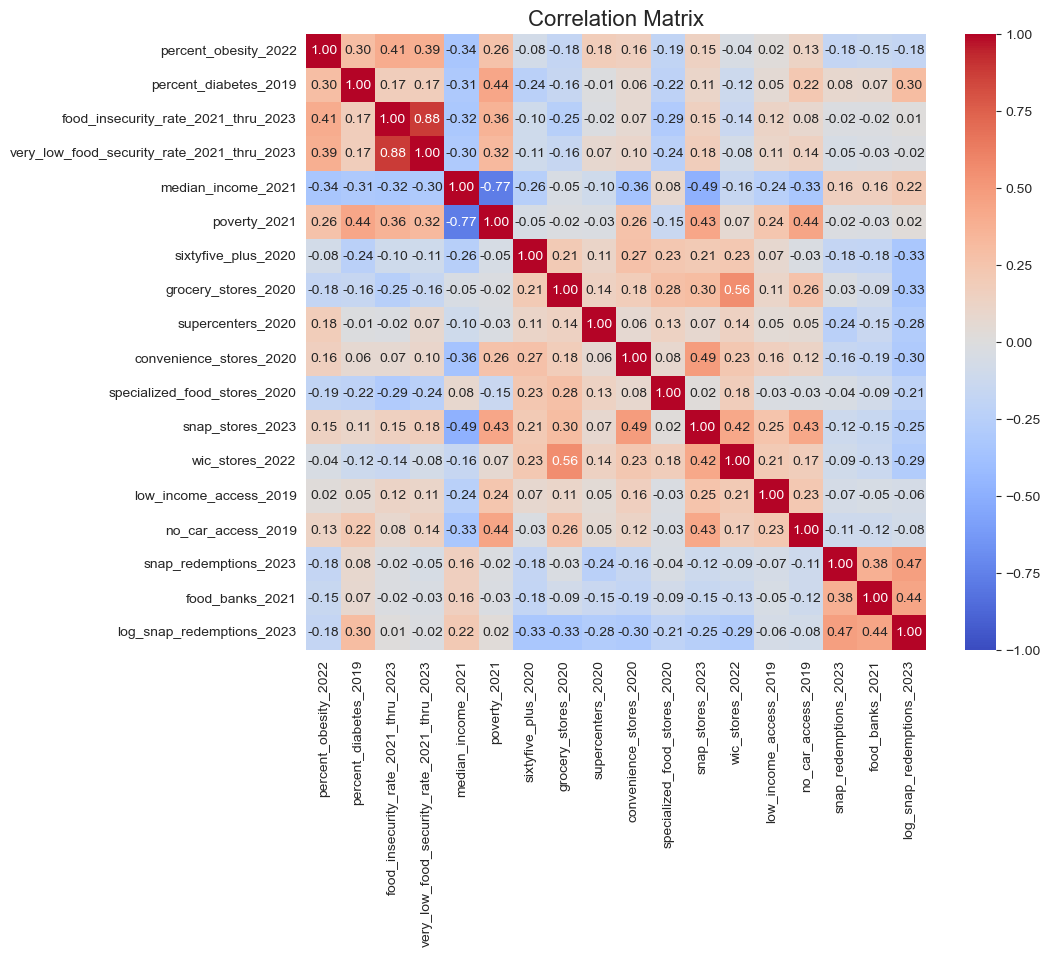

In [436]:
full = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(
    full,  
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    vmin=-1, vmax=1
)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

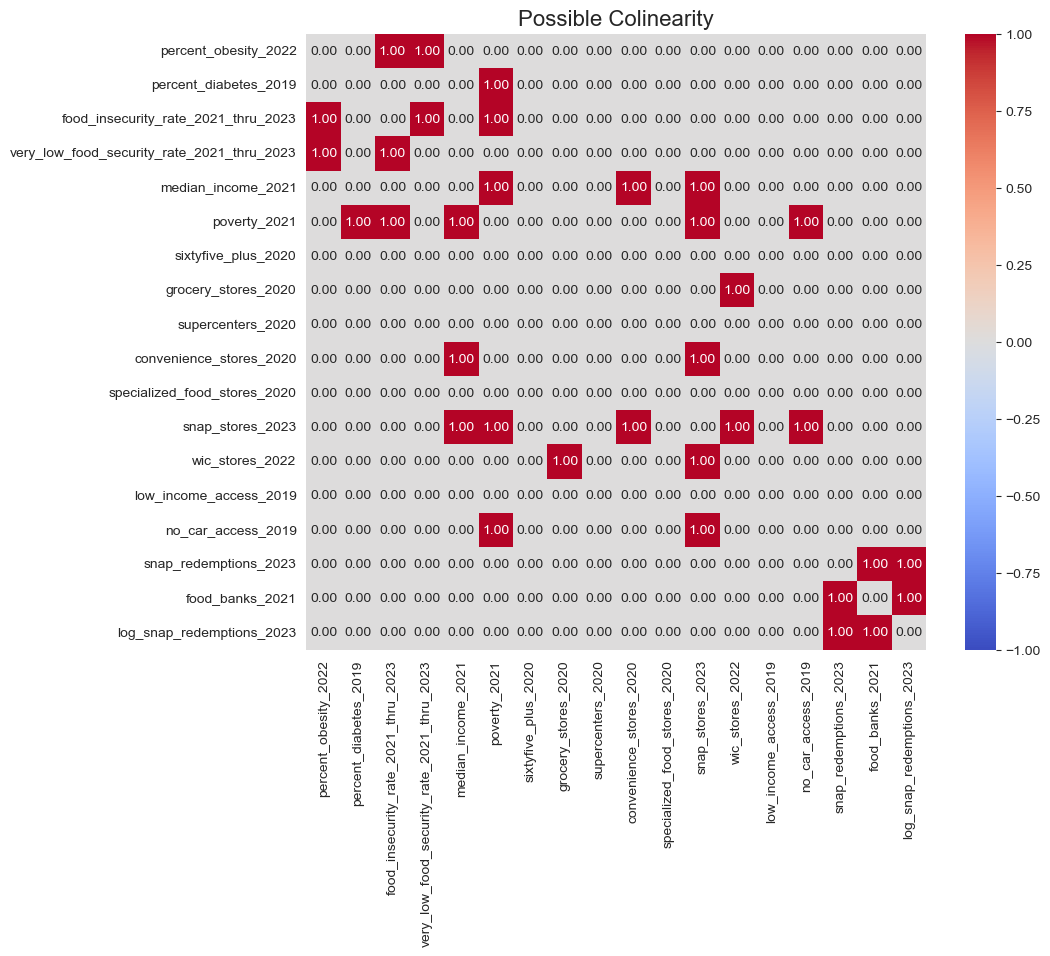

In [447]:
possible_colinearity = full.map(lambda x: 1 if abs(x) > .35 and x != 1 else 0)
plt.figure(figsize=(10,8))
sns.heatmap(
    possible_colinearity,  
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    vmin=-1, vmax=1
)
plt.title("Possible Colinearity", fontsize=16)
plt.show()

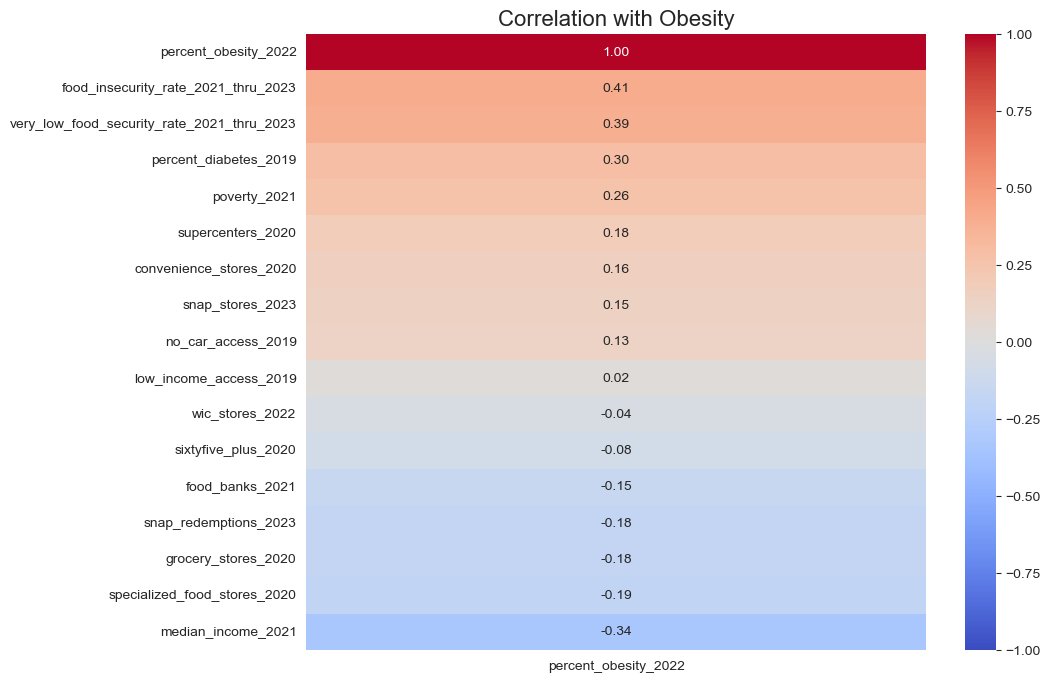

In [311]:
obesity_corr_matrix = df.corr().sort_values(percent_obesity, ascending=False)
plt.figure(figsize=(10,8))
sns.heatmap(
    obesity_corr_matrix[[percent_obesity]],  
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    vmin=-1, vmax=1
)
plt.title("Correlation with Obesity", fontsize=16)
plt.show()

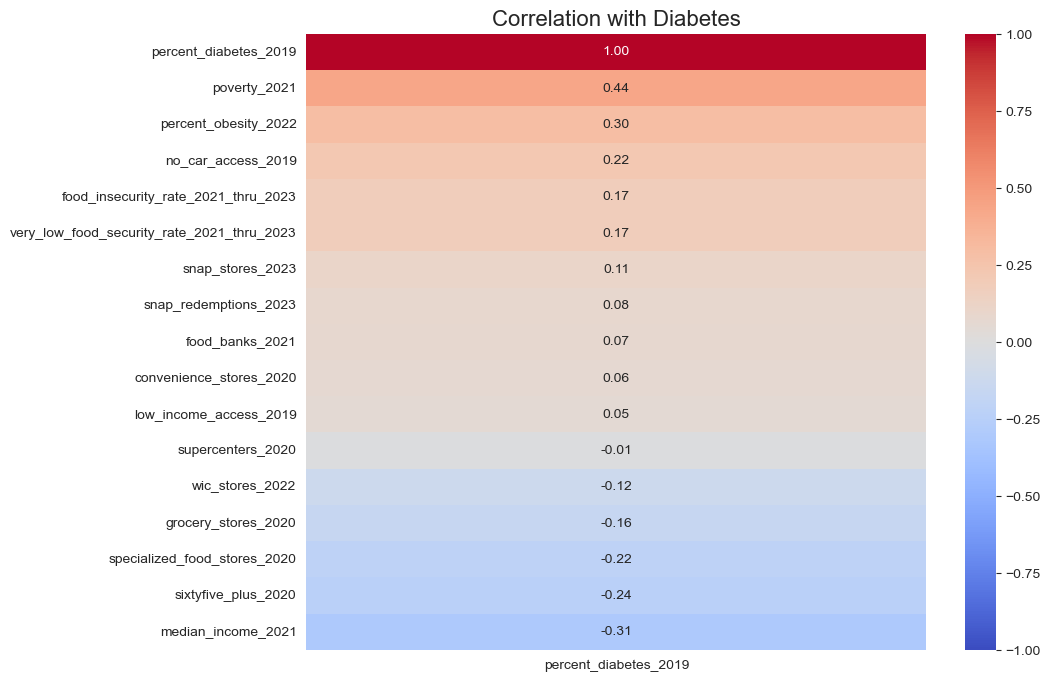

In [312]:
diabetes_corr_matrix = df.corr().sort_values(percent_diabetes, ascending=False)
plt.figure(figsize=(10,8))
sns.heatmap(
    diabetes_corr_matrix[[percent_diabetes]],  
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    vmin=-1, vmax=1
)
plt.title("Correlation with Diabetes", fontsize=16)
plt.show()

##### Investigating Needed Tranformations

The project then explored variables to see if transformation were needed. Because of the number of variables, a multivariable approach was used.

Check for skewness.
- Skew = 0 indicates perfectly symmetric distribution
- Skew >0 indicates right-skewed (long tail to the right)
- Skew <0 indicates left-skewed (long tail to the left)

In [313]:
predictors = [food_insecurity_rate, very_low_food_security_rate, median_income, poverty_rate,
              percent_65_plus, low_income_access, no_car_access, snap_redemptions,
              food_banks, specialized_food_stores, grocery_stores, convenience_stores, 
              supercenters, snap_stores, wic_stores]

In [314]:
skewness = df[predictors].skew().sort_values(ascending=False)
print("Highly skewed predictors:\n", skewness[skewness>=3])

Highly skewed predictors:
 snap_redemptions_2023           16.029124
no_car_access_2019               7.316837
snap_stores_2023                 5.132996
wic_stores_2022                  4.986859
specialized_food_stores_2020     4.598003
grocery_stores_2020              4.298123
convenience_stores_2020          3.201433
food_banks_2021                  3.162139
supercenters_2020                3.047836
dtype: float64


This could mean a small number of counties or states in the dataset have very highly values. Will explore log transformation of the variables.

In [315]:
print("Moderately skewed predictors:\n", skewness[(skewness<3) & (skewness>=1)])

Moderately skewed predictors:
 low_income_access_2019    2.321869
median_income_2021        1.364974
poverty_2021              1.156337
dtype: float64


These values are still skewed but not as severe as noted above. Will explore log transformation if the scatterplots vs obesity show curvature. 


In [316]:
print("Low skew predictors:\n", skewness[(skewness<1)])

Low skew predictors:
 food_insecurity_rate_2021_thru_2023           0.685911
sixtyfive_plus_2020                           0.668971
very_low_food_security_rate_2021_thru_2023    0.124914
dtype: float64


These distributions appear fairly symmetric and can be left as is for regression.

#### Histograms

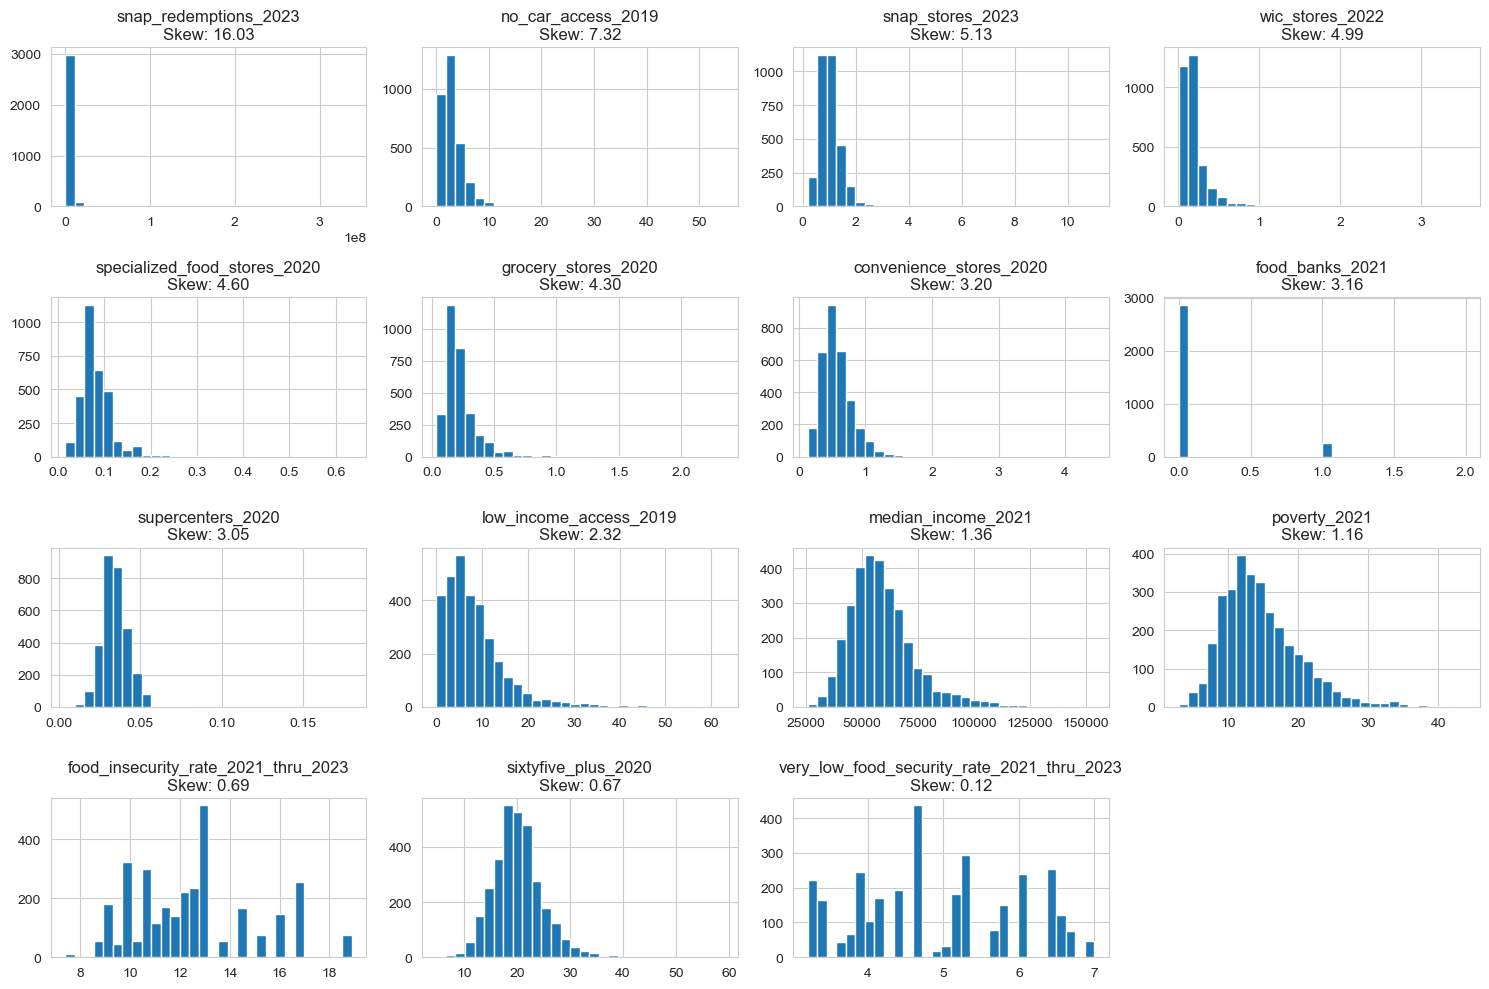

In [317]:
plt.figure(figsize=(15,10))
for i, col in enumerate(skewness.index, 1):
    plt.subplot(4, 4, i)
    df[col].hist(bins=30)
    plt.title(f"{col}\nSkew: {skewness[col]:.2f}")
plt.tight_layout()
plt.show()

In the distribution above it appears that food banks are distributed as either there is a food bank or there is not a food bank. This variable will be treated as a categorical variable.

<!---When I check the documentation on the data site, it looks like this is indeed number of food banks--->

In [318]:
df[food_banks].unique()

array([0.        , 1.        , 0.14285714, 2.        ])

The .14 value is a result of imputing by state.

#### Scatterplots

Scatterplots vs outcomes to check for linearity

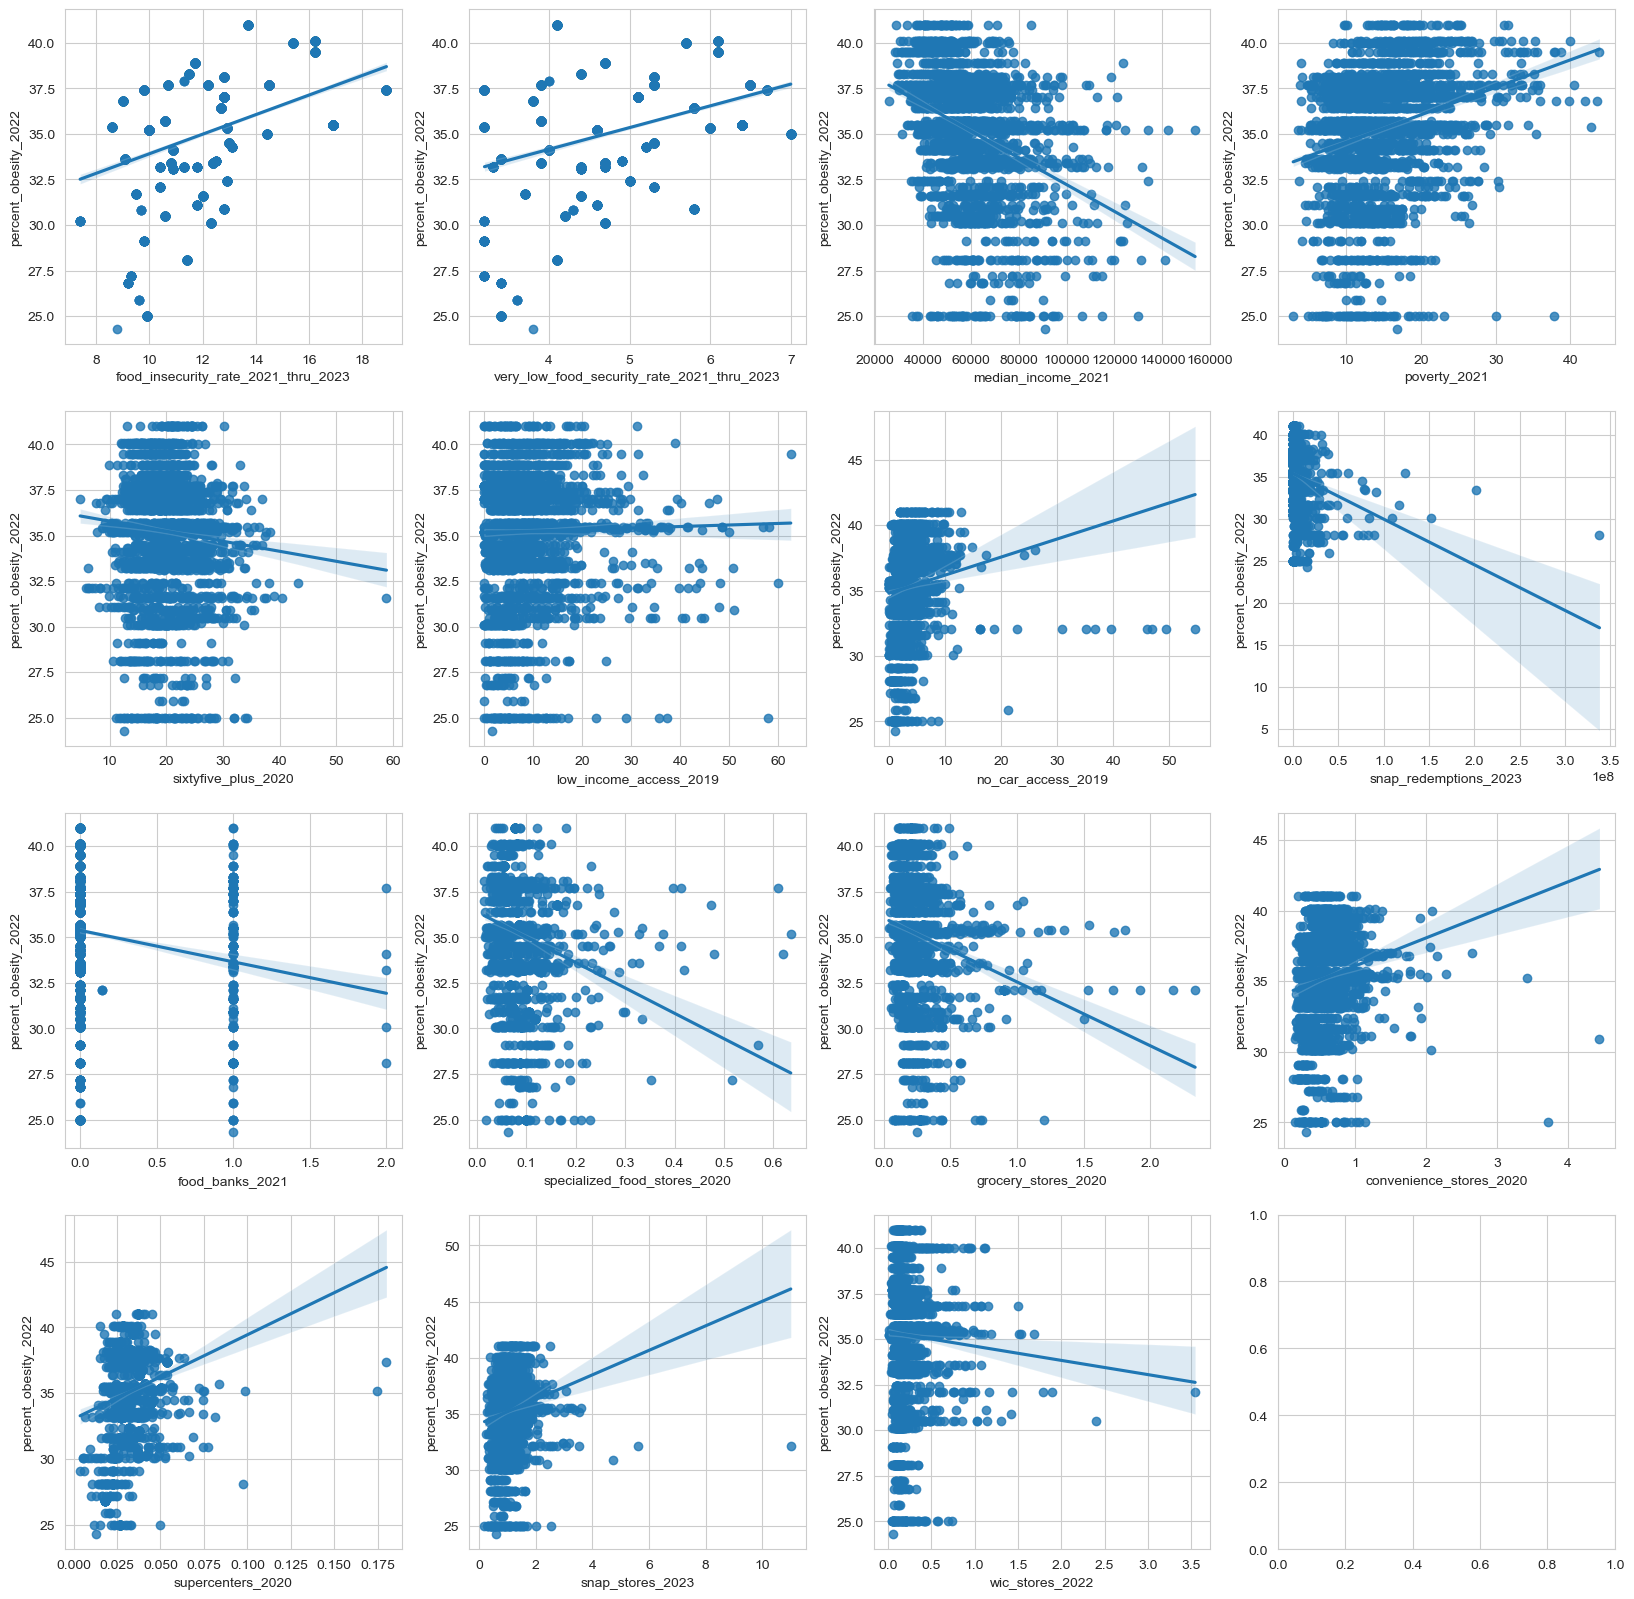

In [319]:
y_variable = obesity
x_variables = predictors

# Create the figure and a set of subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

# Loop through the y-variables and plot on each axis
for i, x_var in enumerate(x_variables):
    sns.regplot(data=df, x=x_var, y=y_variable, ax=axes[i])

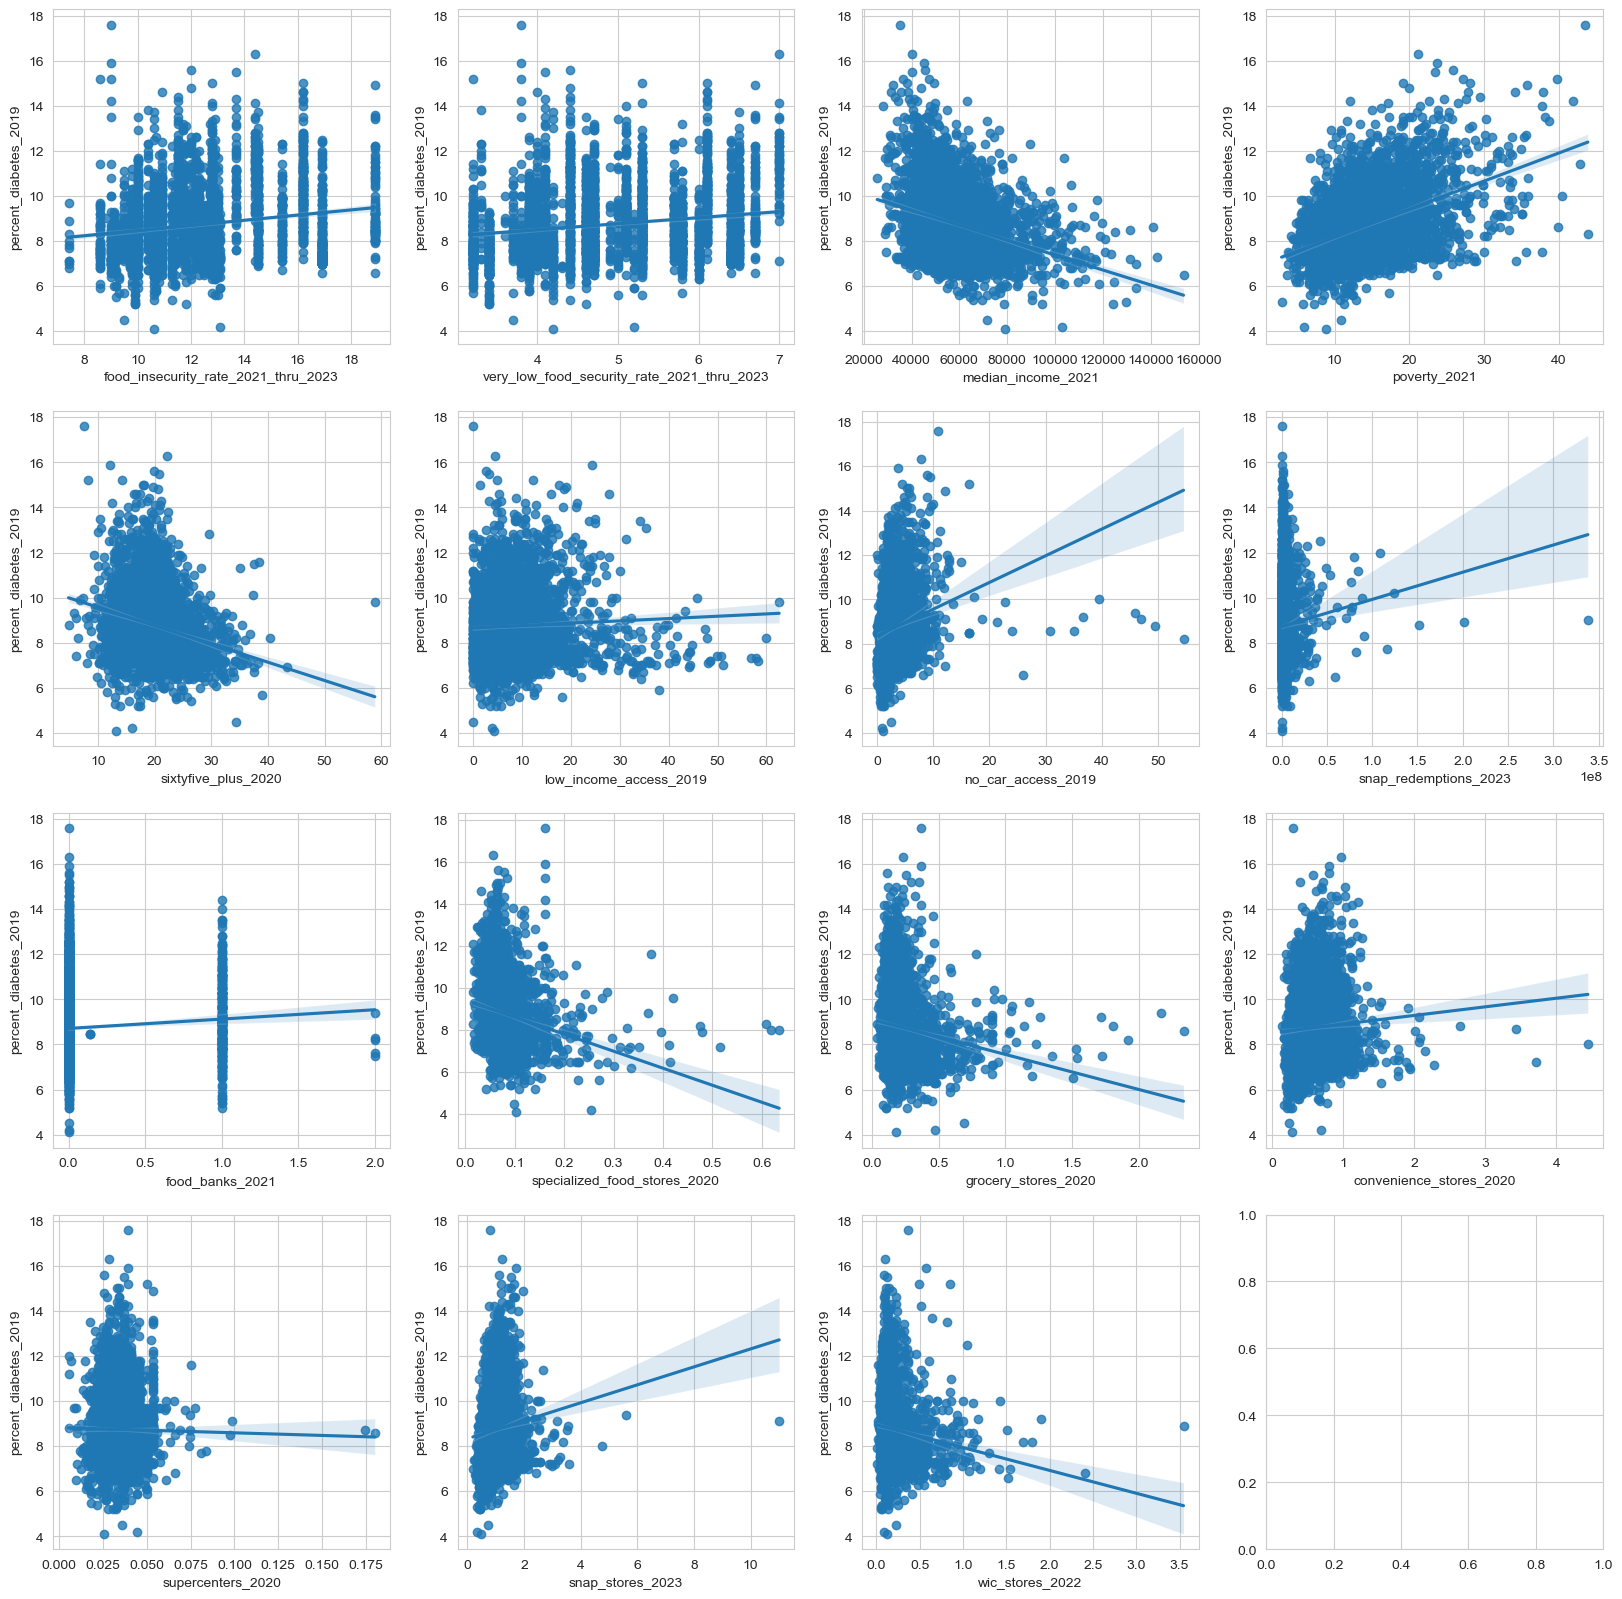

In [320]:
y_variable = diabetes
x_variables = predictors

# Create the figure and a set of subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

# Loop through the y-variables and plot on each axis
for i, x_var in enumerate(x_variables):
    sns.regplot(data=df, x=x_var, y=y_variable, ax=axes[i])

Summary:

We have taken a preliminary look at predictors by measuring their skewness and then visualizing it via plots. We have identified some potential transformations in the categories below.

Highly skewed and need to investigate transformations
- snap_redemptions (16.09) 
- no_car_access (7.31)
- assistance_stores (4.37)

Moderately skewed, transformation could help
- low_income_access (2.32)
- total_stores (2.29)
- median_income (1.35)
- poverty (1.16)

<!---Change to categorical variable:
food_banks 

## Transform Data
### Investigate snap redemptions

In [339]:
model_snap_redemptions = smf.ols(formula= obesity + " ~ " + snap_redemptions, data=df).fit()
print(model_snap_redemptions.summary())

                             OLS Regression Results                             
Dep. Variable:     percent_obesity_2022   R-squared:                       0.031
Model:                              OLS   Adj. R-squared:                  0.031
Method:                   Least Squares   F-statistic:                     100.5
Date:                  Sat, 15 Nov 2025   Prob (F-statistic):           2.67e-23
Time:                          09:06:49   Log-Likelihood:                -8107.4
No. Observations:                  3136   AIC:                         1.622e+04
Df Residuals:                      3134   BIC:                         1.623e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept 

The output above confirms what was determined with the original skewness test, notably the low R-squared value 0.29. 

Look at mean absolute error:

In [324]:
y_hat1= model_snap_redemptions.predict()

In [326]:
np.sqrt(mean_squared_error(df[obesity], y_hat1)).round(3)

3.21

In [327]:
mean_absolute_error(df[obesity], y_hat1)

2.4277681042274195

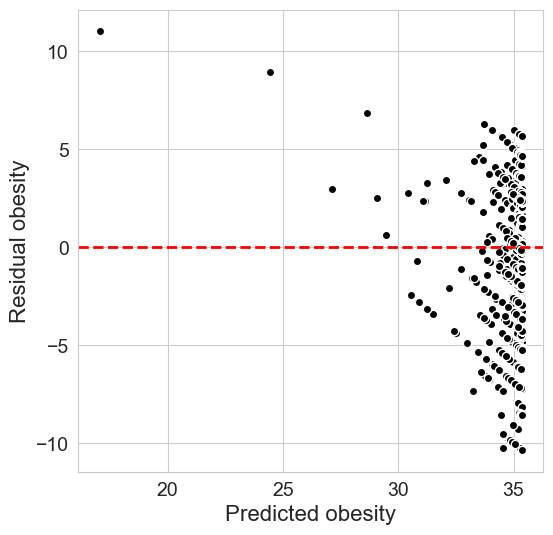

In [328]:
plt.figure(figsize=(6,6))

plt.plot(y_hat1, model_snap_redemptions.resid, "ko", mec="w")
plt.axhline(0, color="r", linestyle="dashed", lw=2)

plt.xlabel("Predicted obesity", fontsize=16)
plt.ylabel("Residual obesity", fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

The residuals are congregated to the right. Will apply log transformation.

In [333]:
snap_redemptions

'snap_redemptions_2023'

In [334]:
log_snap_redemption = "log_snap_redemptions_2023"
df[log_snap_redemption] = np.log1p(df[snap_redemptions])

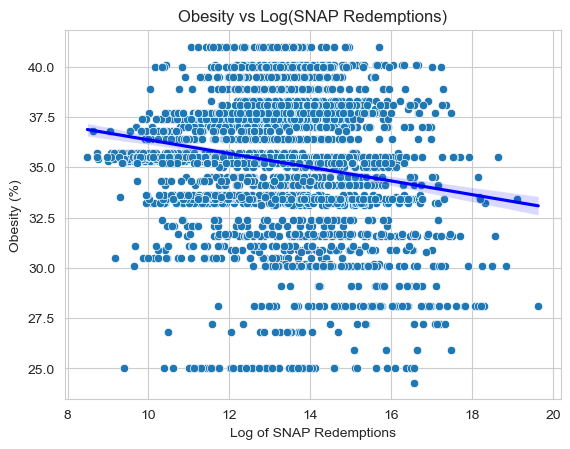

In [335]:
sns.scatterplot(x=log_snap_redemption, y=obesity, data=df)
sns.regplot(x=log_snap_redemption, y=obesity, data=df, scatter=False, color='blue')
plt.xlabel("Log of SNAP Redemptions")
plt.ylabel("Obesity (%)")
plt.title("Obesity vs Log(SNAP Redemptions)")
plt.show()

In [337]:
"a" + "b"

'ab'

In [340]:
model_snap_redemptions_log = smf.ols(formula=obesity +  " ~ " + log_snap_redemption, data=df).fit()
print(model_snap_redemptions_log.summary())

                             OLS Regression Results                             
Dep. Variable:     percent_obesity_2022   R-squared:                       0.031
Model:                              OLS   Adj. R-squared:                  0.030
Method:                   Least Squares   F-statistic:                     99.43
Date:                  Sat, 15 Nov 2025   Prob (F-statistic):           4.47e-23
Time:                          09:06:53   Log-Likelihood:                -8107.9
No. Observations:                  3136   AIC:                         1.622e+04
Df Residuals:                      3134   BIC:                         1.623e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

In [341]:
y_hat2= model_snap_redemptions_log.predict()

In [343]:
np.sqrt(mean_squared_error(df[obesity], y_hat2)).round(3)

3.211

In [344]:
mean_absolute_error(df[obesity], y_hat2)

2.4473719732197825

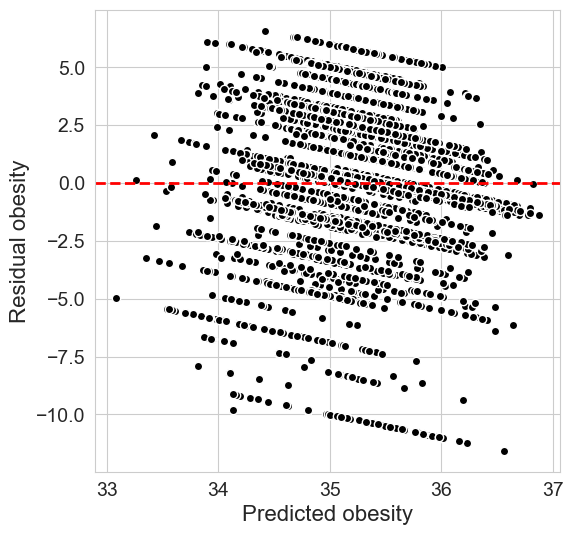

In [345]:
plt.figure(figsize=(6,6))

plt.plot(y_hat2, model_snap_redemptions_log.resid, "ko", mec="w")
plt.axhline(0, color="r", linestyle="dashed", lw=2)

plt.xlabel("Predicted obesity", fontsize=16)
plt.ylabel("Residual obesity", fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

After applying the log transformation, the residuals are more scattered compared to before. There is still some clustering, but the introduction of more variables in the multivariate model may improve this. 

## Model Data

In [425]:
model = smf.ols(obesity + " ~ " + food_insecurity_rate + " + " + median_income + " + " + poverty_rate + " + " + percent_65_plus + " + " + low_income_access + " + " + food_banks, data = df).fit()

In [426]:
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     percent_obesity_2022   R-squared:                       0.260
Model:                              OLS   Adj. R-squared:                  0.259
Method:                   Least Squares   F-statistic:                     183.6
Date:                  Sat, 15 Nov 2025   Prob (F-statistic):          9.34e-201
Time:                          10:49:38   Log-Likelihood:                -7683.9
No. Observations:                  3136   AIC:                         1.538e+04
Df Residuals:                      3129   BIC:                         1.542e+04
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

### Stepwise Regression
Stepwise regressions is a method for constructing the optimal subset of linear regression predictors.

Start by defining our input out output.

In [378]:
X = df.iloc[:,2:]
X = X.drop(columns=snap_redemptions)
Y_obesity = df.iloc[:,0]
Y_diabetes =df.iloc[:,1]

,food_insecurity_rate_2021_thru_2023,very_low_food_security_rate_2021_thru_2023,median_income_2021,poverty_2021,sixtyfive_plus_2020,grocery_stores_2020,supercenters_2020,convenience_stores_2020,specialized_food_stores_2020,snap_stores_2023,wic_stores_2022,low_income_access_2019,no_car_access_2019,food_banks_2021,log_snap_redemptions_2023
0,11.5,4.4,66444.0,10.7,15.718051,0.071244,0.032971,0.463087,0.051932,0.714760,0.068072,13.020998,4.121262,0.0,14.129307
1,11.5,4.4,65658.0,10.8,21.871103,0.126479,0.039252,0.514639,0.126479,0.921086,0.115671,7.936779,2.262118,0.0,15.324919
2,11.5,4.4,38649.0,23.0,20.231535,0.203343,0.032971,0.610029,0.051932,1.648109,0.361780,10.433171,5.567524,0.0,13.999596
3,11.5,4.4,48454.0,20.6,16.220338,0.180701,0.032971,0.451753,0.051932,0.808952,0.179767,0.445866,3.915879,0.0,13.410145
4,11.5,4.4,56894.0,12.0,18.625495,0.069110,0.032971,0.501045,0.051932,0.812499,0.084635,2.512206,3.487118,0.0,13.714560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,13.1,5.2,74677.0,9.2,13.332702,0.117170,0.044630,0.538983,0.123129,0.760474,0.095059,5.226624,1.718154,0.0,13.104999
3140,13.1,5.2,102709.0,5.9,15.978741,0.468145,0.044630,0.680938,0.255352,0.342671,0.085668,3.811752,0.813935,0.0,10.555230
3141,13.1,5.2,70162.0,9.4,14.982885,0.256731,0.044630,0.692555,0.123129,0.876083,0.194685,1.374147,2.281521,0.0,12.425936
3142,13.1,5.2,62176.0,10.2,23.539362,0.256731,0.044630,0.548417,0.123129,0.647249,0.258900,3.068048,1.043336,0.0,11.052208


We will use linear regression and step forward by default--meaning add predictors--scoring by resulting model by accuracy of r^2 by default. Recall r^2 is the proportion RegSS (regression sum of squares, or variance in data explained by the regression model) over the TSS (total sum of squares, or variance in the data). A higher r^2 is preferrable. mlxtend does not support adjusted r^2. The best three features will be kept.

In [430]:
sfs = SequentialFeatureSelector(linear_model.LinearRegression(), k_features=6)
sfs.fit(X, Y_obesity)
feature_names = sfs.k_feature_names_

Now we will split our data into training and testing subsets. Test will be 25% percent of our overall set. Transform the data to only include the attributes selected.

In [431]:
X_obesity_train, X_obesity_test, Y_obesity_train, Y_obesity_test = train_test_split(X, Y_obesity, test_size=0.25, random_state=33)
X_obesity_train_sfs = sfs.transform(X_obesity_train)
X_obesity_test_sfs = sfs.transform(X_obesity_test)

Re-run the linear model with only training data.

In [432]:

model_string = obesity + " ~ " + " + ".join(feature_names)

model_selected = smf.ols(formula=model_string, data=df).fit()
print(model_selected.summary())

# lr_selected = linear_model.LinearRegression()
# lr_selected.fit(X_obesity_train_sfs, Y_obesity_train)
# lr_selected

                             OLS Regression Results                             
Dep. Variable:     percent_obesity_2022   R-squared:                       0.254
Model:                              OLS   Adj. R-squared:                  0.252
Method:                   Least Squares   F-statistic:                     177.4
Date:                  Sat, 15 Nov 2025   Prob (F-statistic):          9.06e-195
Time:                          10:51:45   Log-Likelihood:                -7697.8
No. Observations:                  3136   AIC:                         1.541e+04
Df Residuals:                      3129   BIC:                         1.545e+04
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

Evaluate the model by r^2 for both the training and testing data.

In [394]:
r_squared_obesity_train = lr_selected.score(X_obesity_train_sfs, Y_obesity_train)
r_squared_obesity_test = lr_selected.score(X_obesity_test_sfs, Y_obesity_test)
print("R squared for model obesity using training data: " + str(r_squared_obesity_train))
print("R squared for model obesity using testing data: " + str(r_squared_obesity_test))


R squared for model obesity using training data: 0.2763761307839677
R squared for model obesity using testing data: 0.2237257481470537
